Vous allez dans ce TP, expérimenter des méthodes de classification automatique sur un corpus de données. Le logiciel de classification [bonzaiboost](http://www.irisa.fr/texmex/people/raymond/bonzaiboost/bonzaiboost.html) sera utilisé. Un binaire compilé est intégré dans l'archive récupérable sur moodle.

Le problème de classification est de pouvoir prédire si une personne gagne plus ou moins de 50K dollars par an étant donné un certain nombre de ses caractéristiques listées dans le fichier adult.names.

L'archive TP3.tgz contient 5 fichiers :
1.	un fichier « adult.data » : ce sont les données d’apprentissage (le « train »)
2.	un fichier « adult.test » : ce sont les données de test (le « test »)
3.	un fichier « adult.names » qui décrit la structure des données présentes dans les fichiers précédents :
•	les lignes commençant par « | » sont des commentaires
•	la première ligne non commentée est la liste des classes à prédire
•	les lignes suivantes décrivent les attributs descriptifs
•	les attributs dont le type est « ignore » sont ignorés par le logiciel pour le début du TP (je ne sais pas à quoi ils correspondent)
4. le binaire *bonzaiboost* compilé pour linux
5. une interface python *bonzaitoolsforadult.py* pour exécuter le binaire dans jupyter de manière conviviale et transparente

pour décompresser l'archive: `tar -zxvf TP3.tgz`

> PS: si vous voulez tenter de faire le TP sous windows: le binaire compilé pour windows est [là](http://www.irisa.fr/texmex/people/raymond/bonzaiboost/bonzaiboost-v2.6.exe)


## Exercice 1
un classifieur très naïf est le classifieur qui prédit systématiquement l'étiquette majoritaire. Dans le cas d’un problème binaire où une classe est beaucoup plus fréquente que l’autre, ce classifieur peut fournir une baseline intéressante. Un peu comme prédire systématiquement du mauvais temps en Bretagne, cela peut parfois être moins risqué que de tenter de prendre une décision.

In [2]:
from bonzaitoolsforadult import bonzai
import sys
sys.version

'3.8.10 (default, Nov 26 2021, 20:14:08) \n[GCC 9.3.0]'

In [4]:
#apprends le classifieur naïf: pas de boosting et un arbre à une feuille -> décision=étiquette majoritaire dans le corpus
#clf=bonzai(stem='adult',compatibility=False)#passer compatibility à True si python 3.5
clf=bonzai(stem='adult',bonzaipath="./bonzaiboost")#changer le path vers le bon binaire si on est sous windows plutôt que linux

#depth=0 -> profondeur de l'arbre à 0 
#iter=0 -> pas de boosting, juste un arbre
clf.fit(depth=0,iter=0) 


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load data : [100%] 32561/32561 [ 00:00<00:00 66451.02it/s ]

 Build Tree: [100%] |██████████████████████████████| 32561/32561 [ 00:00<00:00 ?it/s ]


In [5]:
#évalue l'apprentissage
clf.predict('adult.data',False)


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.tree.xml] --> done
 Load data : [100%] 32561/32561 [ 00:00<00:00 66586.91it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      32561 │     24720 │   24720 │   7841 │     75.92 │ 100.00 │     86.31 │      31.72 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │   sup50K │          0 │      7841 │       0 │   7841 │    100.00 │   0.00 │      0.00 │     100.00 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │      All │      32561 │     32561 │   24720 │   7841 │     75.92 │  75.92 │     75.92 │      24

In [6]:
#évalue sur le test
clf.predict('adult.test',False)


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.tree.xml] --> done
 Load data : [100%] 16281/16281 [ 00:00<00:00 67276.86it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      16281 │     12435 │   12435 │   3846 │     76.38 │ 100.00 │     86.61 │      30.93 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │   sup50K │          0 │      3846 │       0 │   3846 │    100.00 │   0.00 │      0.00 │     100.00 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │      All │      16281 │     16281 │   12435 │   3846 │     76.38 │  76.38 │     76.38 │      23

## Exercice 2 
étudiez le problème et proposez selon votre intuition un arbre de décision binaire à 4 feuilles qui permettrait de classer ces données plus efficacement que le classifieur précédent.

### Exemple de code permettant facilement de définir un arbre: à vous d'en définir un qui marche mieux que le clf naïf

In [30]:
from bonzaitoolsforadult import Node, Leaf
    


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.tree.xml] --> done
 Load data : [100%] 32561/32561 [ 00:00<00:00 65912.96it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      29949 │     24720 │   22491 │   7458 │     75.10 │  90.98 │     82.28 │      30.17 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │   sup50K │       2612 │      7841 │     383 │   7458 │     14.66 │   4.88 │      7.33 │      95.12 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │      All │      32561 │     32561 │   22874 │   9687 │     70.25 │  70.25 │     70.25 │      29

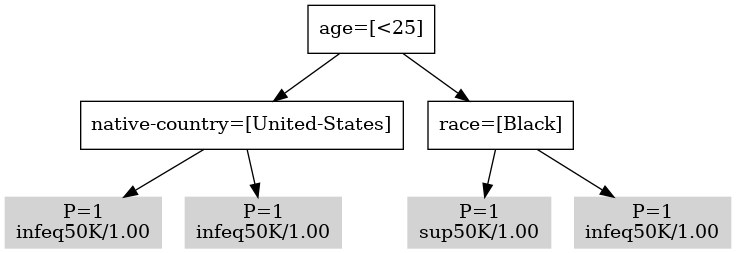

In [31]:
arbre = Node('age','25') #for numeric question the rule is "<" so the yes branch contains people <35 and no branch >=35
arbre.yes = Node('native-country','United-States')
arbre.yes.yes=Leaf('infeq50K')
arbre.yes.no=Leaf('infeq50K')
arbre.no = Node('race','Black')
arbre.no.yes=Leaf('sup50K')
arbre.no.no=Leaf('infeq50K')

#converti l'arbre en modèle bonzaiboost
clf.to_bonzaimodel(arbre)
#visualise l'arbre pour s'assurer que c'est celui que l'on souhaitais
clf.visualize_tree()
#P=le nombre d’exemples dans la feuille
#la feuille indique l’étiquette majoritaire accompagnée de sa probabilité
#ici ce sont des règles de décision manuelle donc on a généré une population virtuelle de 1



### évaluation de son efficacité

In [9]:
clf.predict('adult.test',False)


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.tree.xml] --> done
 Load data : [100%] 16281/16281 [ 00:00<00:00 65914.98it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      14975 │     12435 │   11307 │   3668 │     75.51 │  90.93 │     82.50 │      29.50 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │   sup50K │       1306 │      3846 │     178 │   3668 │     13.63 │   4.63 │      6.91 │      95.37 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │      All │      16281 │     16281 │   11485 │   4796 │     70.54 │  70.54 │     70.54 │      29

> **Q1**: proposer un classifieur à 4 feuilles selon votre intuition sur les données


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.tree.xml] --> done
 Load data : [100%] 32561/32561 [ 00:00<00:00 65122.00it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      30065 │     24720 │   23814 │   6251 │     79.21 │  96.33 │     86.94 │      25.29 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │   sup50K │       2496 │      7841 │    1590 │   6251 │     63.70 │  20.28 │     30.76 │      79.72 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │      All │      32561 │     32561 │   25404 │   7157 │     78.02 │  78.02 │     78.02 │      21

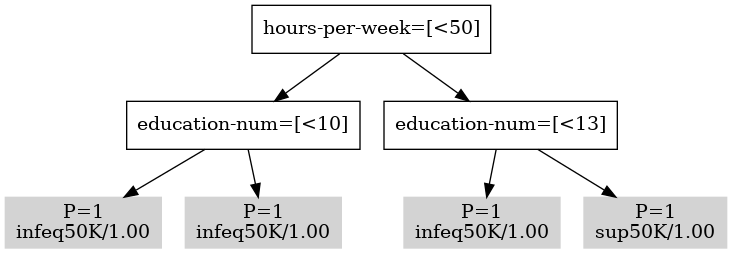

In [48]:
arbre = Node('hours-per-week','50') #for numeric question the rule is "<" so the yes branch contains people <35 and no branch >=35
arbre.yes = Node('education-num', '10')
arbre.yes.yes=Leaf('infeq50K')
arbre.yes.no=Leaf('infeq50K')
arbre.no = Node('education-num','13')
arbre.no.yes=Leaf('infeq50K')
arbre.no.no=Leaf('sup50K')

#converti l'arbre en modèle bonzaiboost
clf.to_bonzaimodel(arbre)
#visualise l'arbre pour s'assurer que c'est celui que l'on souhaitais
clf.visualize_tree()
#P=le nombre d’exemples dans la feuille
#la feuille indique l’étiquette majoritaire accompagnée de sa probabilité
#ici ce sont des règles de décision manuelle donc on a généré une population virtuelle de 1



> **Q2**: votre classifieur marche-til mieux que le classifieur naïf ?

In [ ]:
75.92 < 78.02 mais pas très significatif...

### Comparons votre intuition avec la réalité statistique du corpus: on conserve l'arbre mais on met à jour les règles de décision dans les feuilles en accord avec les statistiques du corpus d'apprentissage

In [49]:
#ATTENTION fonctionne seulement pour des arbres équilibrés à 4 feuilles
clf.update_decisions()


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load data : [100%] 32561/32561 [ 00:00<00:00 64992.02it/s ]

 Load file : [adult.tree.xml] --> done
 
 [AT:1/1]--- Resume Node with 32561 exemples, Depth=0
         --> Q was =[hours-per-week:<50]
 
 [AT:1/1]--- Resume Node with 26099 exemples, Depth=1
         --> Q was =[education-num:<10]
 Build Tree: [ 38%] |███████████▒░░░░░░░░░░░░░░░░░░| 12528/32561 [ 00:00<00:00 ?it/s ]
 [AT:1/1]--- Resume Node with 6462 exemples, Depth=1
         --> Q was =[education-num:<13]
 Build Tree: [100%] |██████████████████████████████| 32561/32561 [ 00:00<00:00 3617888.89it/s ]



 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.tree.xml] --> done
 Load data : [100%] 32561/32561 [ 00:00<00:00 65383.53it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      30065 │     24720 │   23814 │   6251 │     79.21 │  96.33 │     86.94 │      25.29 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │   sup50K │       2496 │      7841 │    1590 │   6251 │     63.70 │  20.28 │     30.76 │      79.72 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │      All │      32561 │     32561 │   25404 │   7157 │     78.02 │  78.02 │     78.02 │      21

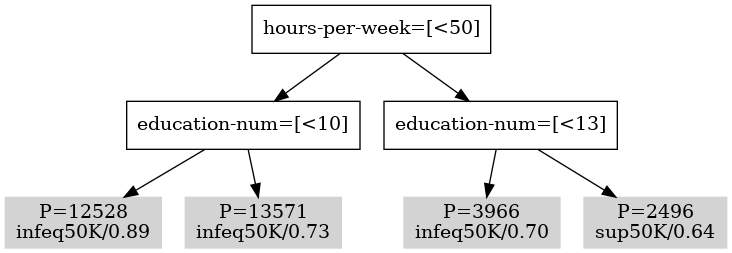

In [50]:
clf.visualize_tree()

> **Q3**: En quoi la réalité statistique diffère de votre intuition ?

la feuile yes.yes est assez vrai, les autres sont moyennement vrai

### Laissons maintenant l’algorithme construire un arbre à 4 feuilles:


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load data : [100%] 32561/32561 [ 00:00<00:00 66723.36it/s ]

 Extract features -> 285 -> cut
 Cut (age:73 ->  -> 73)
 Cut (workclass:9 ->  -> 9)
 Cut (fnlwgt:0 ->  -> 0)
 Cut (education:16 ->  -> 16)
 Cut (education-num:16 ->  -> 16)
 Cut (marital-status:7 ->  -> 7)
 Cut (occupation:15 ->  -> 15)
 Cut (relationship:6 ->  -> 6)
 Cut (race:5 ->  -> 5)
 Cut (sex:2 ->  -> 2)
 Cut (capital-gain:0 ->  -> 0)
 Cut (capital-loss:0 ->  -> 0)
 Cut (hours-per-week:94 ->  -> 94)
 Cut (native-country:42 ->  -> 42)
  -> 285
 
 [1/1]--- Start Node with 32561 exemples, Depth=0
 	--- Questions:[age=73][workclass=9][fnlwgt=0][education=16][education-num=16][marital-status=7][occupation=15][relationship=6][race=5][sex=2][capital-gain=0][capital-loss=0][hours-per-week=94][native-country=42]
 	x-x Q with %gain(009.256) Gentropy(0.0737) name=[age:<27.5]
 	x-x Q with %gain(001.482) Gentropy(0.0118) name=[workclass:Self-emp-inc]
 	x-x Q 

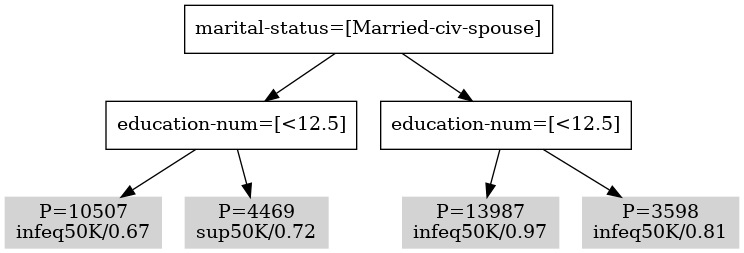

In [52]:
#on l'entraine
clf.fit(depth=2,verbose=True)
#verbose permet de voir plus de detail sur la construction de l'arbre
#teste hauteur par hauteur et non le meilleur arbre possible
#regarde l'entropie
#on l'évalue
clf.predict('adult.test')
#on le visualize
clf.visualize_tree()

> **Q4**: interprétez l'arbre obtenu, est-il meilleur que le votre ?

L'arbre obtenu est meilleur que celui testé. Sous l'attribut mariage civile se cache surement beaucoup de condition intéressante pour notre étude ( on se marie qu'à partir d'un certain âge et d'un certain niveau de vie par exemple )

___
## Exercice 3 : nous allons maintenant construire un classifieur plus évolué en laissant l’arbre se développer.
- Nous allons utiliser tous les attributs descriptifs: **remplaçez dans le fichier adult.names les « ignore » par « continuous ».**
- Et un critère d'arrêt automatique appelé [MDLPC](https://www.ijcai.org/Proceedings/93-2/Papers/022.pdf) (Minimum Description Length Principle)

In [63]:
#on l'entraine
clf.fit(mdlpc=True)
#on l'évalue sur l'apprentissage
clf.predict('adult.data')
#puis le test
clf.predict('adult.test')
#on ne le visualize pas nécessairement car il est un peu trop gros
#clf.visualize_tree()


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load data : [100%] 32561/32561 [ 00:00<00:00 84794.27it/s ]

 Build Tree: [100%] |██████████████████████████████| 32561/32561 [ 00:03<00:00 9702.32it/s ]]

 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.tree.xml] --> done
 Load data : [100%] 32561/32561 [ 00:00<00:00 86368.70it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      27050 │     24720 │   23626 │   3424 │     87.34 │  95.57 │     91.27 │      13.85 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │   sup50K │       5511 │      7841 │    4417 │   3424 │     80.15 │  56.33 

> **Q1**:	Qu'observez-vous au niveau des performances par rapport au classifieur précédent ? 

81.94 < 86.12 presque 5% en plus, assez significatif

> **Q2**:.	Qu'observez-vous au niveau des performances sur les données d’apprentissage par rapport aux performances sur les données de test ?

Pas de différence

### Maintenant, nous allons développer l’arbre jusqu’au bout (aucun critère de stop) 

In [58]:
clf.fit(depth=10000)
clf.predict('adult.data')
clf.predict('adult.test')


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load data : [100%] 32561/32561 [ 00:00<00:00 84794.27it/s ]

 Build Tree: [100%] |██████████████████████████████| 32561/32561 [ 01:18<00:00 413.45it/s ]]

 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.tree.xml] --> done
 Load data : [100%] 32561/32561 [ 00:00<00:00 85238.22it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      24721 │     24720 │   24720 │      1 │    100.00 │ 100.00 │    100.00 │       0.00 │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │   sup50K │       7840 │      7841 │    7840 │      1 │    100.00 │  99.99 │

> **Q3**: Même questions que précédemment, à quel phénomène avons nous affaire ?

## Exercice 4 : nous allons maintenant utiliser un algorithme de méta-apprentissage sur des arbres de décision. Le boosting sur un millier d’arbres simples à 2 feuilles


In [64]:
clf.fit(iter=1000)
clf.predict('adult.data',boosting=True)
clf.predict('adult.test',boosting=True)


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load data : [100%] 32561/32561 [ 00:00<00:00 84354.92it/s ]

 Extract features -> 22144 -> cut -> 22144 features extracted in 575ms on 14 attributes
 Run AdaBoost.MH: [100%] |██████████████████████████████| 1000/1000 [ 04:01<00:00 4.15it/s ]

 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.boost.xml] --> done
 Load data : [100%] 32561/32561 [ 00:00<00:00 87529.57it/s ]

 Load round: [100%] 1000/1000 [ 00:00<00:00 90909.09it/s ]

 Predict   : [100%] |█████████████████████████| 32561/32561 [ 00:06<00:00 4827.43it/s ]

 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      26055 │     24720 │   23324 │


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.boost.xml] --> done
 Load data : [100%] 32561/32561 [ 00:00<00:00 85015.67it/s ]

 Load round: [100%] 1000/1000 [ 00:00<00:00 100000.00it/s ]

 
 Draw curve: [100%] |█████████████████████████| 1000/1000 [ 00:35<00:00 28.02it/s ]

 
 adult.boost.plot.head generated (contains gnuplot instruction)
 adult.boost.plot      generated (contains coordinates)
 ┌─────────────────────────────────────────────────────────────────┐
 │ Run "gnuplot adult.boost.plot.head" to generate adult.boost.png │
 ├─────────────────────────────────────────────────────────────────┤
 
 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      26055 │     247

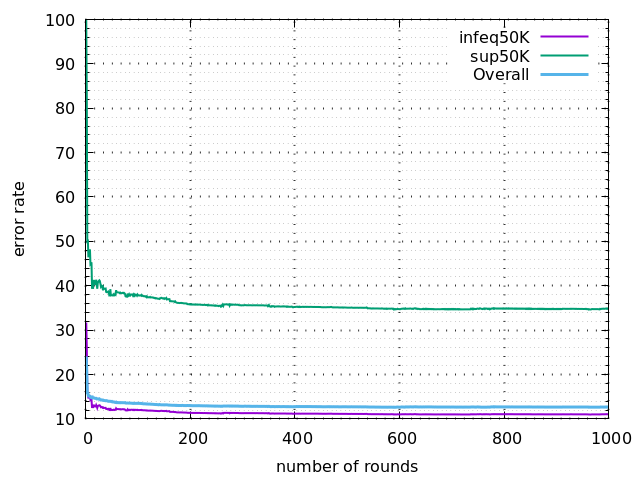

In [68]:
clf.get_learning_curves('adult.data')


 adult.names indicate:
    -    14 attributes
    -     2 target labels
 Load file : [adult.boost.xml] --> done
 Load data : [100%] 16281/16281 [ 00:00<00:00 82644.67it/s ]

 Load round: [100%] 1000/1000 [ 00:00<00:00 100000.00it/s ]

 
 Draw curve: [100%] |█████████████████████████| 1000/1000 [ 00:17<00:00 56.36it/s ]

 
 adult.boost.plot.head generated (contains gnuplot instruction)
 adult.boost.plot      generated (contains coordinates)
 ┌─────────────────────────────────────────────────────────────────┐
 │ Run "gnuplot adult.boost.plot.head" to generate adult.boost.png │
 ├─────────────────────────────────────────────────────────────────┤
 
 ┌──────────┬────────────┬───────────┬─────────┬────────┬───────────┬────────┬───────────┬────────────┐
 │    Label │ Hypothesis │ Reference │ correct │ Erreur │ Precision │ Recall │ F-measure │ Error rate │
 ├──────────┼────────────┼───────────┼─────────┼────────┼───────────┼────────┼───────────┼────────────┤
 │ infeq50K │      13041 │     124

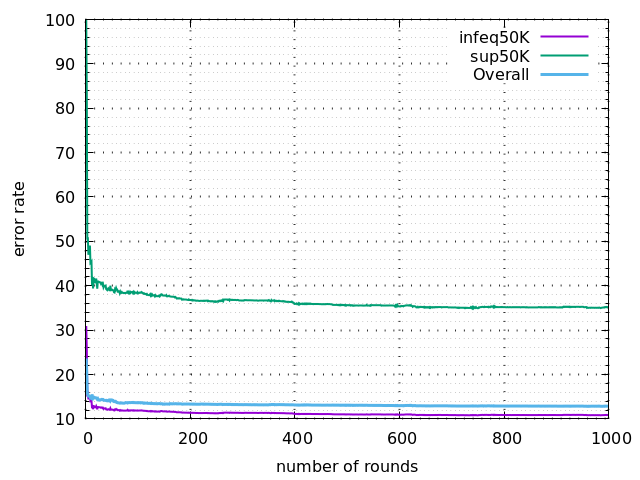

In [67]:
clf.get_learning_curves('adult.test')

### Générer un tableau récapitulatif du modèle de boosting produit
Ce tableau récapitule toutes les conditions examinées par les mini arbres de décision, et donne pour chacune le vote octroyé à chacune des classes. 

In [69]:
clf.feedback(filter=0.7)

adult.names indicate:
   -    14 attributes
   -     2 target labels
Load file : [adult.boost.xml] --> done
Load round: [100%] 1000/1000 [ 00:00<00:00 100000.00it/s ] 


Feature,type,position,selected,selected in %
fnlwgt,numeric,fnlwgt,4,4.0%
race,discret,race,1,1.0%
age,numeric,age,13,13.0%
capital-gain,numeric,capital-gain,17,17.0%
hours-per-week,numeric,hours-per-week,3,3.0%
education-num,numeric,education-num,6,6.0%
capital-loss,numeric,capital-loss,20,20.0%
occupation,discret,occupation,11,11.0%
native-country,discret,native-country,5,5.0%
workclass,discret,workclass,3,3.0%


> **Q7**: En vous aidant de ce tableau, donnez les attributs les plus efficaces pour discriminer les individus gagnant plus de 50K de ceux qui en gagnent moins

## Exercice 5 :
Prise en main de [scikit-learn](http://scikit-learn.org/stable/) et construction d'un SVM. Il est trop long d'apprendre et tuner un SVM sur les données précédentes : impossible à faire en TP. Les données utilisées ici seront une tâche de reconnaissance de digits (chiffres de 0 a 9) à partir d'imagettes.


In [70]:
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

### Chargement des données et découpage:
- 75% pour les données d'apprentissage
- 25% pour les données de test

In [ ]:
#on prend un corpus de reconnaissance de digits (chiffres de 0 a 9) sur imagettes
digits = datasets.load_digits()
X = digits.data #X = matrice des examples d'apprentissages (nbexamples*nbvariablespourdecrireunexemple)
y = digits.target#Y = vecteur des nbexamples étiquettes (vérité terrain)

#découpage de nos données en 2, un train pour apprendre un classifieur,et un test pour estimer l'erreur réelle du classifieur
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=False)

> **Question**
> 1. entrainer un SVM *linéaire* sans aucun tuning et évaluez le
> 2. entrainez un SVM à noyau *RBF* sans tuning et évaluez-le : comparez
> 3. tuner les paramètres du noyau *RBF*, évaluez et comparez
> 4. obervez les données: y-avait-t-il un prétraitement à faire avant la classification ? si oui faite-le

### évaluation du classifieur

In [ ]:
#apply the classifier on the test data
print("Apply")
predictions = clf.predict(x_test)
#check the performances of the classifier
print(classification_report(y_test, predictions,digits=4))

> Qoptionnel: vous pouvez vérifier si le gain entre le système SVM et KNN sont statisquement significatif en utilisant les tests de student apparié et de wilcoxon

In [ ]:
from scipy.stats import ttest_rel,wilcoxon
